<a href="https://colab.research.google.com/github/rockerritesh/easyOCR_Nepali/blob/main/Nepali_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nepali OCR detector.

## importing Module

In [1]:
!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable
  Using cached easyocr-1.7.0-py3-none-any.whl (2.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 5.4 MB/s eta 0:00:00m eta 0:00:010:00:010m
  Using cached opencv_python_headless-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 8.4 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.2 MB/s eta 0:00:00m eta 0:00:010:01m:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 10.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached ninja-1.11.1-py2.py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (145 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:

import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

/home/limsim/.local/lib/python3.11/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


## Loading pre trained model.

'ne' for Nepali and 'en' for english and simillary for other

In [2]:
reader = easyocr.Reader(['hi']) #'ne' for Nepali and 'en' for english and simillary for other

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


## Normal image to Scaned image

In [3]:
def map(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def highPassFilter(img,kSize):
    if not kSize%2:
        kSize +=1
    kernel = np.ones((kSize,kSize),np.float32)/(kSize*kSize)
    filtered = cv2.filter2D(img,-1,kernel)
    filtered = img.astype('float32') - filtered.astype('float32')
    filtered = filtered + 127*np.ones(img.shape, np.uint8)
    filtered = filtered.astype('uint8')
    return filtered

def blackPointSelect(img, blackPoint):
    img = img.astype('int32')
    img = map(img, blackPoint, 255, 0, 255)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_TOZERO)
    img = img.astype('uint8')
    return img

def whitePointSelect(img,whitePoint):
    _,img = cv2.threshold(img, whitePoint, 255, cv2.THRESH_TRUNC)
    img = img.astype('int32')
    img = map(img, 0, whitePoint, 0, 255)
    img = img.astype('uint8')
    return img

def blackAndWhite(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    (l,a,b) = cv2.split(lab)
    img = cv2.add( cv2.subtract(l,b), cv2.subtract(l,a) )
    return img
def scan_effect(img):
    
    blackPoint = 66
    whitePoint = 130
    image = highPassFilter(img,kSize = 51)
    image_white = whitePointSelect(image, whitePoint)
    img_black = blackPointSelect(image_white, blackPoint)
    image=blackPointSelect(img,blackPoint)
    white = whitePointSelect(image,whitePoint)
    img_black = blackAndWhite(white)
    return img_black



> Enter the location of image file

In [13]:
loc="/home/limsim/Desktop/maithili_book/2023-06-23_09-38.png"

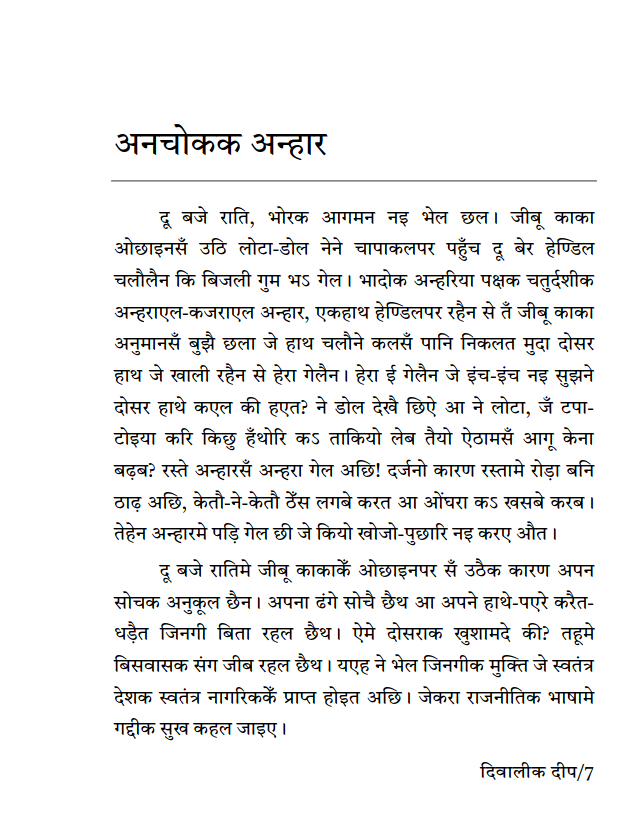

In [14]:

Image(loc)

In [6]:
img = cv2.imread(loc)
image = scan_effect(img)
#from google.colab.patches import cv2_imshow
#cv2_imshow(image)
filename = 'scanned.jpg'
cv2.imwrite(filename, image)

True

## Loading Image

In [7]:
path=filename

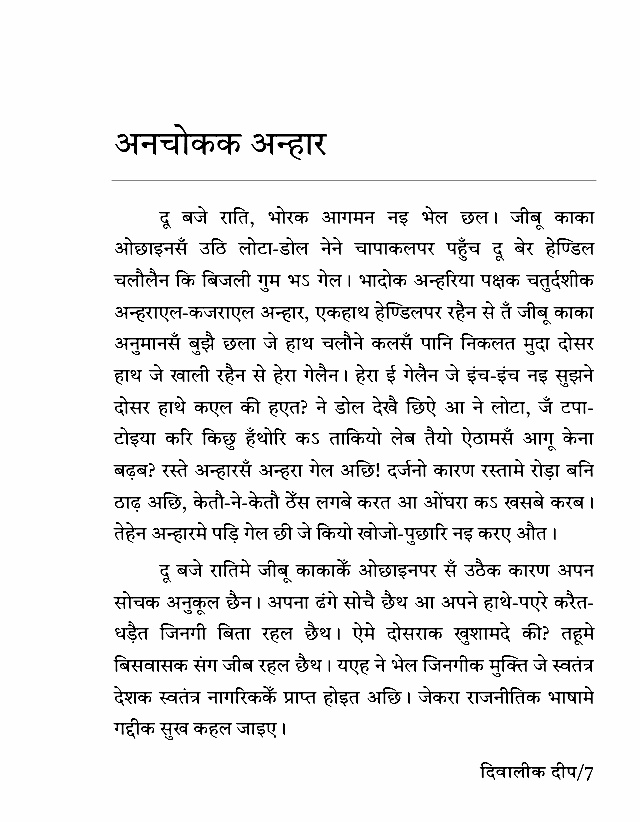

In [8]:

Image(path)

## Detecting character from image

In [15]:
output = reader.readtext(path)

In [23]:
output[10][1]

'उठि लोटा-डोल नेने'

## Output

In [10]:
output

[([[108, 118], [334, 118], [334, 166], [108, 166]],
  'अनचोकक अन्हार',
  0.8829715983801882),
 ([[180, 204], [256, 204], [256, 228], [180, 228]],
  'बजे   राति',
  0.6647974547282933),
 ([[266, 204], [312, 204], [312, 228], [266, 228]],
  'भोरक',
  0.9992395043373108),
 ([[319, 209], [377, 209], [377, 227], [319, 227]],
  'आगमन',
  0.7719466591968989),
 ([[385, 209], [411, 209], [411, 227], [385, 227]], 'नइ', 0.9777723164543725),
 ([[418, 204], [452, 204], [452, 228], [418, 228]], 'भेल', 0.9990559816360474),
 ([[459, 209], [501, 209], [501, 227], [459, 227]],
  'छल |',
  0.6271038300927118),
 ([[508, 204], [548, 204], [548, 234], [508, 234]],
  'जीबू',
  0.9523113500893121),
 ([[553, 211], [597, 211], [597, 227], [553, 227]], 'काका', 0.421892003750621),
 ([[112, 234], [190, 234], [190, 260], [112, 260]],
  'ओछाइनसँ',
  0.9682059542492243),
 ([[196, 232], [346, 232], [346, 260], [196, 260]],
  'उठि लोटा-डोल नेने',
  0.4192253924649289),
 ([[355, 241], [437, 241], [437, 259], [355, 259]]

## Total detection

In [11]:
print(f'Total number of detection',len(output))

Total number of detection 44


## Previewing Output

अनचोकक अन्हार
बजे   राति
भोरक
आगमन
नइ
भेल
छल |
जीबू
काका
ओछाइनसँ
उठि लोटा-डोल नेने
चापाकलपर
पहुँच दू बेर हेण्डिल
चलौलैन कि बिजली गुम भ५ गेल
भादोक अन्हरिया पक्षक चतुर्दशीक
अन्हराएल कजराएल अन्हार, एकहाथ हेण्डिलपर
: रहैन से तँ जीबू
कफ
अनुमानसँ बुझै छला जे हाथ चलौने कलसँ पानि निकलत मुदा दोसर
हाथ जे खाली रहैन से हेरा
गेलैन| हेरा ई गेलैन जे इंच-इंच नइ सुझने
दोसर हाथे कएल की हएतः ने डोल देखै छिऐ आने लोटा, जँ टपा-
टोइया करि किछु हँथोरि कड ताकियो लेब तैयो ऐठामसँ आगू केना
बढ़बः रस्ते अन्हारसँ अन्हरा गेल अछिः दर्जनो कारण
रोड़ा बनि
ठाढ़ अछि, केतौ ने केतौ ठेँस लगबे करत आ ओंघरा कड खसबे करब
तेहेन अन्हारमे पड़ि गेल छी जे कियो खोजो- पुछारि नइ करए औत |
दू बजे रातिमे
काकाकेँ ओछाइनपर सँ उठैक कारण अपन
सोचक अनुकूल छैन
अपना ढंगे सोचै छैथ आ अपने हाथे॰पएरे करैत-
धडैत
जिनगी बिता रहल छैथ| ऐमे दोसराक
की?   तहूमे
बिसवासक संग जीब रहल छैथ
यएह ने भेल
जिनगीक मुक्ति जे स्वतंत्र
देशक स्वतंत्र नागरिककेँ प्राप्त होइत अछि
जेकरा राजनीतिक भाषामे
गद्दीक सुख कहल जाइए|
दिवालीक दीप 7
रस्तामे
जीबू
खुशामदे


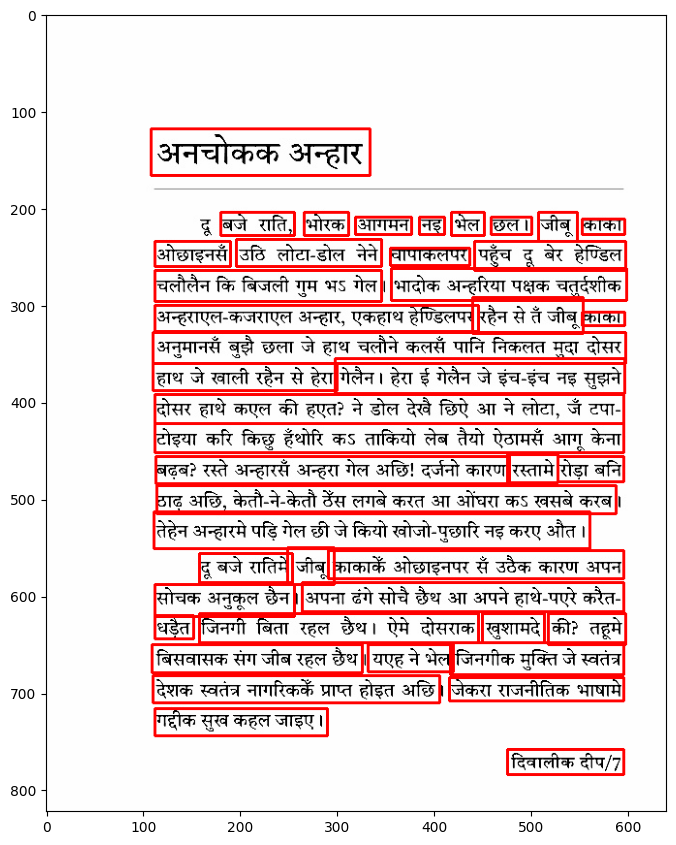

In [12]:
image = cv2.imread(path)
for i in range(len(output)):
  cord = output[i][0]
  x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
  x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
  cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
  print(output[i][1])

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  

# pdf automate

In [1]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np
from pylab import rcParams
from IPython.display import Image

def map(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def highPassFilter(img,kSize):
    if not kSize%2:
        kSize +=1
    kernel = np.ones((kSize,kSize),np.float32)/(kSize*kSize)
    filtered = cv2.filter2D(img,-1,kernel)
    filtered = img.astype('float32') - filtered.astype('float32')
    filtered = filtered + 127*np.ones(img.shape, np.uint8)
    filtered = filtered.astype('uint8')
    return filtered

def blackPointSelect(img, blackPoint):
    img = img.astype('int32')
    img = map(img, blackPoint, 255, 0, 255)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_TOZERO)
    img = img.astype('uint8')
    return img

def whitePointSelect(img,whitePoint):
    _,img = cv2.threshold(img, whitePoint, 255, cv2.THRESH_TRUNC)
    img = img.astype('int32')
    img = map(img, 0, whitePoint, 0, 255)
    img = img.astype('uint8')
    return img

def blackAndWhite(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    (l,a,b) = cv2.split(lab)
    img = cv2.add( cv2.subtract(l,b), cv2.subtract(l,a) )
    return img
def scan_effect(img):
    
    blackPoint = 66
    whitePoint = 130
    image = highPassFilter(img,kSize = 51)
    image_white = whitePointSelect(image, whitePoint)
    img_black = blackPointSelect(image_white, blackPoint)
    image=blackPointSelect(img,blackPoint)
    white = whitePointSelect(image,whitePoint)
    img_black = blackAndWhite(white)
    return img_black



/home/limsim/.local/lib/python3.11/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
reader = easyocr.Reader(['hi'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [3]:
from pdf2image import convert_from_path
import shutil
import os

# Path to the PDF file
path_folder = "book"

# Path to the directory
directory_path = "temp"

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory {directory_path} created successfully.")
else:
    print(f"Directory {directory_path} already exists.")

Directory temp already exists.


In [5]:
for path in os.listdir(path_folder):
    pdf_path = path_folder+'/' + path
    print(pdf_path)
    
    # Convert PDF to images
    images = convert_from_path(pdf_path)

    text = " "

    for i, image in enumerate(images):

        image_path = f"temp/image_{i+1}.jpg"  # Output image path and format
        image.save(image_path, "JPEG")

        image = cv2.imread(image_path)

        image = scan_effect(image)

        output = reader.readtext(image)
        
        os.remove(image_path)
        
        for i in range(len(output)):
            text += output[i][1]

        #print(text)
        # Save the text to a separate text file
        text_file_path = f"temp/text_{i+1}.txt"
        with open(text_file_path, "w", encoding="utf-8") as text_file:
            text_file.write(text)

        print(f"Text from page {i+1} saved.")
        
        #break;
        
    # Save the combined text to a single text file
    combined_text_file_path = f"combined_text{path}.txt"
    with open(combined_text_file_path, "w", encoding="utf-8") as combined_text_file:
        combined_text_file.write(text)

    print("Combined text saved.")
    
    #break;

book/test.pdf
Text from page 3 saved.
Combined text saved.


In [6]:
# Path to the folder to be removed
folder_path = "temp"

# Verify if the folder exists
if os.path.exists(folder_path):
    # Remove the folder and its contents
    shutil.rmtree(folder_path)
    print(f"Folder {folder_path} and its contents have been successfully removed.")
else:
    print(f"Folder {folder_path} does not exist.")

Folder temp and its contents have been successfully removed.


In [7]:
text

' कथा-संग्रहदिवालीक ढापजगदीश प्रसाद मण्डल'